In [38]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [40]:
# Load the California Housing dataset
data_bunch = fetch_california_housing(as_frame=True)
df = data_bunch.frame  # Access the DataFrame


In [41]:
# prints the columns
print("Columns in DataFrame:", df.columns)


Columns in DataFrame: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [42]:
correlation = df['Population'].corr(df['MedHouseVal'])
print("Correlation between House Age and Median House Value:", correlation)

Correlation between House Age and Median House Value: -0.024649678888894896


In [43]:
# Display basic information and the first few rows of the dataset
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.

In [44]:
# Preprocessing
# Handling missing values if any
imputer = SimpleImputer(strategy='median') # replace missing values with median 
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) # calculate the median for each column

In [45]:
# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_filled.drop('MedHouseVal', axis=1))

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df_filled['MedHouseVal'], test_size=0.2, random_state=42)

In [47]:
# Model training
model = RandomForestRegressor(random_state=42)  # Use RandomForestRegressor
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # y_test = actual values from the test set

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

In [49]:
# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")


Mean Squared Error (MSE): 0.25549776668540763
Root Mean Squared Error (RMSE): 0.5054678690929896
Mean Absolute Error (MAE): 0.32761306601259704
R-squared: 0.805024407701793


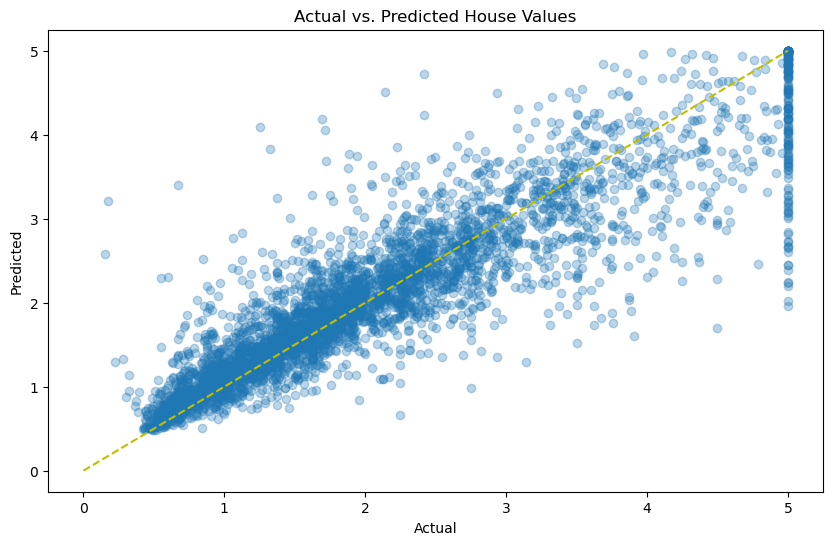

In [50]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], '--y')  # A reference line for perfect predictions
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()